# 天气最高预测任务

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
features = pd.read_csv('./data/whether01.csv')
features.head()

,date,max_average,average,temp_1,temp_2,actual
0,2015/1/4,-12,-14,2,1,3
1,2015/1/5,-3,-9,1,3,-12
2,2015/1/6,-6,-10,3,-12,-3
3,2015/1/7,-12,-16,-12,-3,-6
4,2015/1/8,2,-7,-3,-6,-12


In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 6 columns):
date           997 non-null object
max_average    997 non-null int64
average        997 non-null int64
temp_1         997 non-null int64
temp_2         997 non-null int64
actual         997 non-null int64
dtypes: int64(5), object(1)
memory usage: 46.8+ KB


In [4]:
features.shape

(997, 6)

In [5]:
# 指定随机的种子
seed = 42
np.random.seed(seed)

# 数据集的切分，test_size：代表的是切分的比例
from sklearn.model_selection import train_test_split

train_features,test_features = train_test_split(features,test_size = 0.7,random_state = seed)

In [6]:
print("训练集的数据量为：",train_features.shape)
print("测试集的数据量为：",test_features.shape)

训练集的数据量为： (299, 6)
测试集的数据量为： (698, 6)


In [44]:
# test_features.to_csv('./data/csv/test_temp.csv')

In [45]:
# train_features.to_csv('./data/csv/train_temp.csv')

In [43]:
features = pd.read_csv('./data/csv/train_temp.csv')
features.head()

,date,max_average,average,temp_1,temp_2,actual
0,2017/3/1,8,2,8,14,9
1,2016/10/6,14,10,27,22,23
2,2017/6/9,33,25,30,29,32
3,2016/7/8,32,26,36,34,32
4,2017/3/4,23,9,8,9,14


In [44]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
date           299 non-null object
max_average    299 non-null int64
average        299 non-null int64
temp_1         299 non-null int64
temp_2         299 non-null int64
actual         299 non-null int64
dtypes: int64(5), object(1)
memory usage: 14.1+ KB


# 处理时间

In [9]:
# import datetime 

# # 分别得到年月日
# years = features['year']
# months = features['month']
# days = features['day']

# # 转换成datetime格式，将三者进行拼接,要转换成str形式，
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,
#          month,day in zip(years,months,days)]
# dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [45]:
date = np.array(features['date'])
date[:5]

array(['2017/3/1', '2016/10/6', '2017/6/9', '2016/7/8', '2017/3/4'],
      dtype=object)

# 数据展示

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [12]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = True

d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


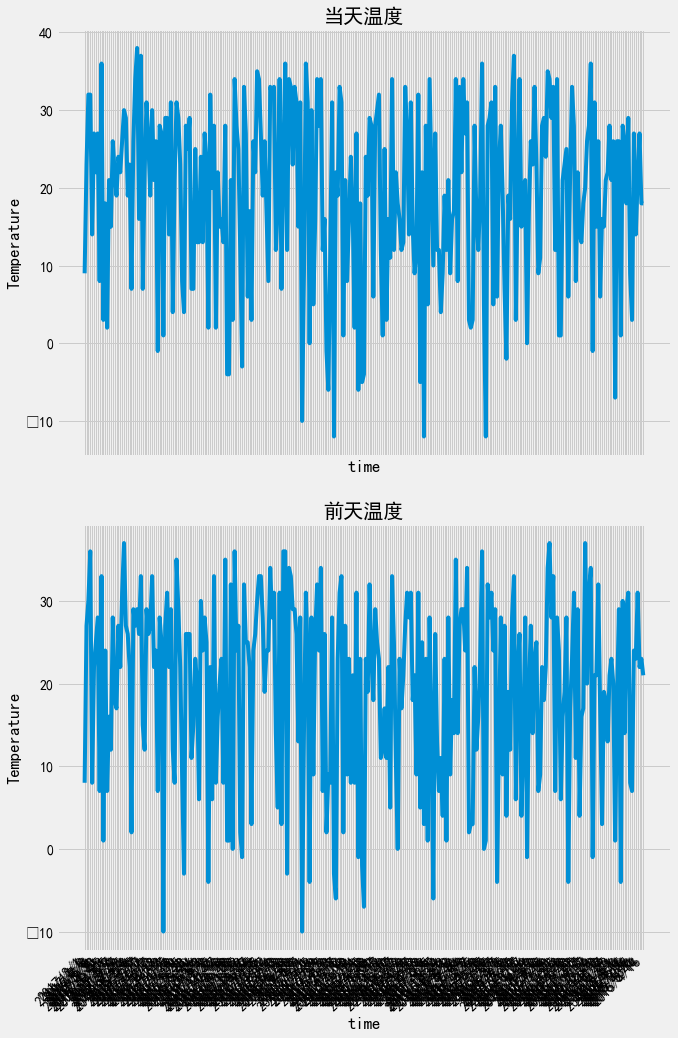

In [13]:
# 设置布局
fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols = 1,figsize = (10,15))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(date,features['actual'])
ax1.set_xlabel('time');ax1.set_ylabel('Temperature');ax1.set_title('当天温度')

# 标签值
ax2.plot(date,features['temp_1'])
ax2.set_xlabel('time');ax2.set_ylabel('Temperature');ax2.set_title('前天温度')

plt.tight_layout(pad = 2)

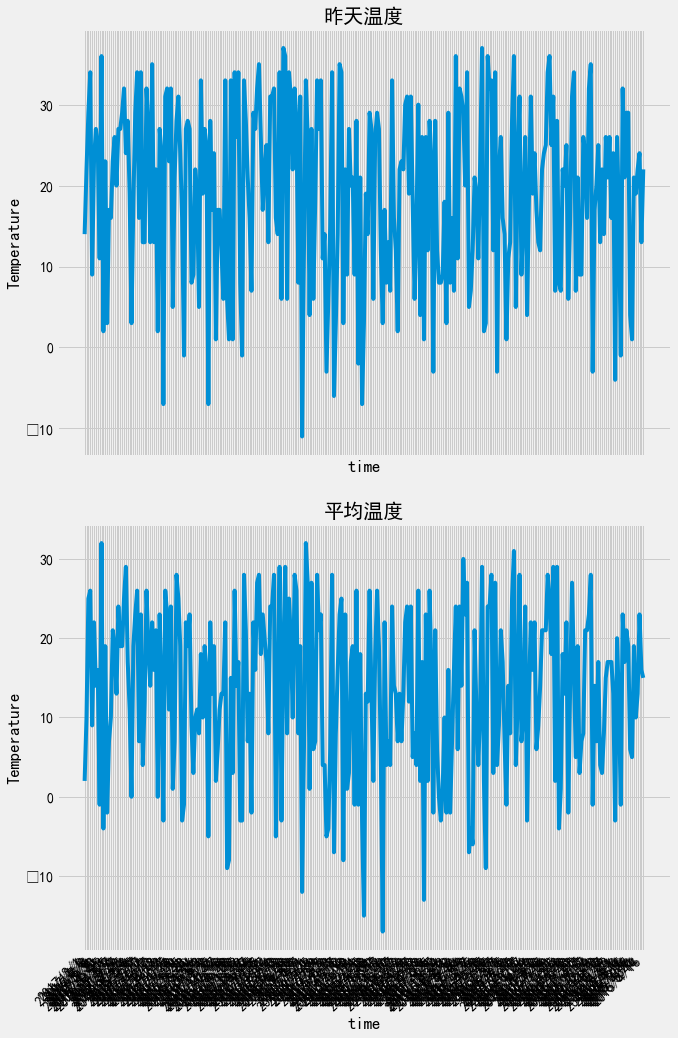

In [14]:
# 设置布局
fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols = 1,figsize = (10,15))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(date,features['temp_2'])
ax1.set_xlabel('time');ax1.set_ylabel('Temperature');ax1.set_title('昨天温度')

# 标签值
ax2.plot(date,features['average'])
ax2.set_xlabel('time');ax2.set_ylabel('Temperature');ax2.set_title('平均温度')

plt.tight_layout(pad = 2)

# 基本随机森林的建立 

# one-hot ecoding: 将数据中非数值的属性列转换为数值类

In [64]:
# # sklearn和pandas都可以，pandas较简单
# features = pd.get_dummies(features)
# features.head()

In [46]:
features.head()

,date,max_average,average,temp_1,temp_2,actual
0,2017/3/1,8,2,8,14,9
1,2016/10/6,14,10,27,22,23
2,2017/6/9,33,25,30,29,32
3,2016/7/8,32,26,36,34,32
4,2017/3/4,23,9,8,9,14


# 标签与数据格式的转换

In [47]:
# 标签
labels = np.array(features['actual'])


In [48]:
# 在特征中去掉标签
features = features.drop('actual',axis = 1)
features = features.drop('date',axis = 1)

In [49]:
# 名字单独保存
feature_list = list(features.columns)

# 转换成合适的格式
features = np.array(features)

# 训练集与测试集进行切分

In [50]:
from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.25,
                                                                         random_state = 42)

In [51]:
print("训练集的特征：",train_features.shape)
print("训练集的标签：",train_labels.shape)
print("测试集的特征：",test_features.shape)
print("测试集的标签：",test_labels.shape)

训练集的特征： (224, 4)
训练集的标签： (224,)
测试集的特征： (75, 4)
测试集的标签： (75,)


# 建立一个基础的随机森林模型

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
# 建立模型
rf = RandomForestRegressor(n_estimators = 1000,random_state = 42)

# # 训练模型
rf.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

# 测试

In [54]:
# 预测结果
predictions = rf.predict(test_features)

# 计算误差
errors = abs(predictions - test_labels)

#mean absulote percentage error (MAPE)
# 避免除以0，肩上一个小的浮动：+0.00001
mape = (errors / (test_labels+0.00001))

print('MAPE:',np.mean(mape))

MAPE: 4814.8910086086635


# MAPE指标
# 可视化展示树

In [55]:
from sklearn.tree import export_graphviz
import pydot 

# 拿到其中的一棵树
tree = rf.estimators_[5]

# 导出dot文件
export_graphviz(tree,out_file = 'tree01.dot',feature_names = feature_list,rounded = True,precision = 1)

# 绘图
(graph,) = pydot.graph_from_dot_file('tree01.dot')
# （graph,）= pydot.graph_from_dot_file('tree01.dot')

# 展示
graph.write_png('tree01.png');

In [56]:
# 查看树的深度
print('树的深度是：',tree.tree_.max_depth)

树的深度是： 14


# 限制树的深度 

In [57]:
rf_small = RandomForestRegressor(n_estimators = 10,max_depth = 3,random_state = 42)

rf_small.fit(train_features,train_labels)

# 提取一颗树
tree_small = rf_small.estimators_[5]

# 保存
export_graphviz(tree_small,out_file = 'small_tree01.dot',feature_names = feature_list,rounded = True,precision = 1)

(graph,) = pydot.graph_from_dot_file('small_tree01.dot')

graph.write_png('small_tree01.png');

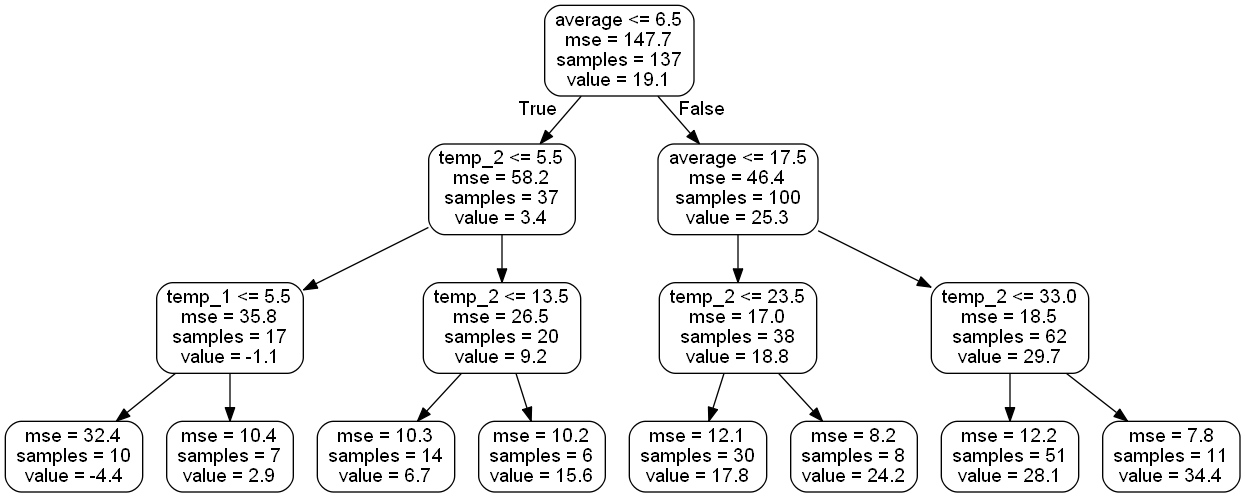

In [58]:
from IPython.display import Image

Image(graph.create_png())

# 特征的重要性

In [59]:
importances = list(rf.feature_importances_)

# 转换格式
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]

# 排序
feature_importances = sorted(feature_importances,key = lambda x:x[1],reverse = True)

# 对应进行打印
[print('Variable: {:20} Importance:{}'.format(*pair)) for pair in feature_importances]

Variable: average              Importance:0.44
Variable: max_average          Importance:0.31
Variable: temp_2               Importance:0.21
Variable: temp_1               Importance:0.03


[None, None, None, None]

# 用最重要的特征在来建模

In [60]:
# 选择最重要的两个特征进行尝试
# 选择的特征越少，结果越不好，mape的损失值越大
rf_most_important = RandomForestRegressor(n_estimators = 1000,random_state = 42)

# 两个特征
important_indices = [feature_list.index('average'),feature_list.index('max_average')]
train_important = train_features[:,important_indices]
test_important = test_features[:,important_indices]

#重新训练模型
rf_most_important.fit(train_important,train_labels)

# 预测训练模型
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# 评估结果
mape = np.mean(errors/(test_labels+0.00001))
print('MAPE:',np.mean(mape))

MAPE: 8431.03936756114


# 画图展示特征的重要性

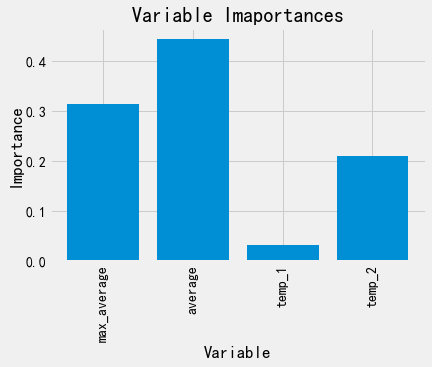

In [121]:
x_values = list(range(len(importances)))

# 绘图
plt.bar(x_values,importances,orientation = 'vertical')

# x轴的名字（）
plt.xticks(x_values,feature_list,rotation = 'vertical')

# 图名
plt.ylabel('Importance');
plt.xlabel('Variable');
plt.title('Variable Imaportances');

# 加入新的数据和特征

In [63]:
import pandas as pd

features = pd.read_csv('./data/csv/whether01.csv')
features.head()

,date,average,max_average,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
1,2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2,2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
3,2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
4,2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 40 columns):
date               997 non-null object
average            997 non-null int64
max_average        997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
actual             997 non-null float64
temp_2             997 non-null float64
temp_1             997 non-null float64
mintempm_1         997

In [126]:
features.describe()

,average,max_average,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,13.129388,19.509529,6.438315,13.109328,13.088265,13.066199,6.440321,6.420261,6.393180,1016.139418,...,3.198596,1019.913741,1019.917753,1019.927783,1012.317954,1012.319960,1012.326981,2.593180,2.593180,2.573049
std,10.971591,11.577275,10.957267,10.984613,11.001106,11.017312,10.596265,10.606550,10.619083,7.582453,...,11.251536,7.755590,7.757705,7.757805,7.885743,7.886681,7.889511,8.428058,8.428058,8.410223
min,-17.000000,-12.000000,-27.000000,-17.000000,-17.000000,-17.000000,-22.000000,-22.000000,-22.000000,989.000000,...,-28.000000,993.000000,993.000000,993.000000,956.000000,956.000000,956.000000,0.000000,0.000000,0.000000
25%,5.000000,11.000000,-2.000000,5.000000,5.000000,5.000000,-2.000000,-2.000000,-2.000000,1011.000000,...,-6.000000,1015.000000,1015.000000,1015.000000,1008.000000,1008.000000,1008.000000,0.000000,0.000000,0.000000
50%,15.000000,22.000000,7.000000,15.000000,14.000000,14.000000,7.000000,7.000000,7.000000,1016.000000,...,4.000000,1019.000000,1019.000000,1019.000000,1012.000000,1012.000000,1012.000000,0.000000,0.000000,0.000000
75%,22.000000,29.000000,16.000000,22.000000,22.000000,22.000000,16.000000,16.000000,16.000000,1021.000000,...,13.000000,1024.000000,1024.000000,1024.000000,1017.000000,1017.000000,1017.000000,0.250000,0.250000,0.250000
max,32.000000,38.000000,26.000000,32.000000,32.000000,32.000000,24.000000,24.000000,24.000000,1040.000000,...,22.000000,1055.000000,1055.000000,1055.000000,1035.000000,1035.000000,1035.000000,95.760000,95.760000,95.760000


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# 风格设置
plt.style.use('fivethirtyeight')

In [11]:
date = np.array(features['date'])
date[:5]

array(['2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08'], dtype=object)

d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


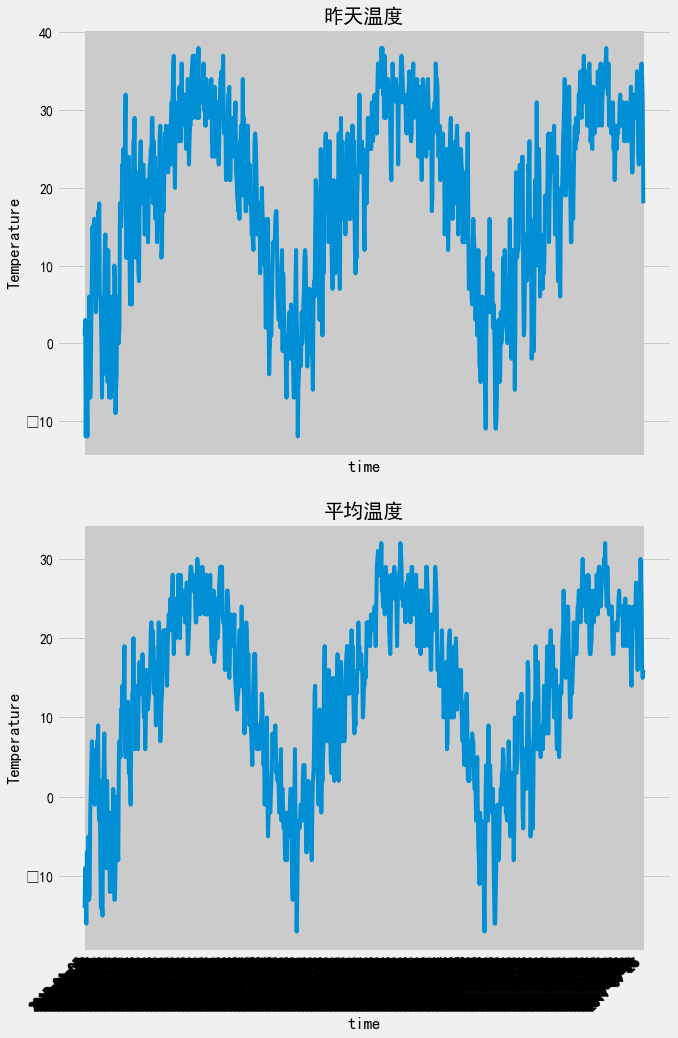

In [129]:
# 设置布局
fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols = 1,figsize = (10,15))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(date,features['temp_2'])
ax1.set_xlabel('time');ax1.set_ylabel('Temperature');ax1.set_title('昨天温度')

# 标签值
ax2.plot(date,features['average'])
ax2.set_xlabel('time');ax2.set_ylabel('Temperature');ax2.set_title('平均温度')

plt.tight_layout(pad = 2)

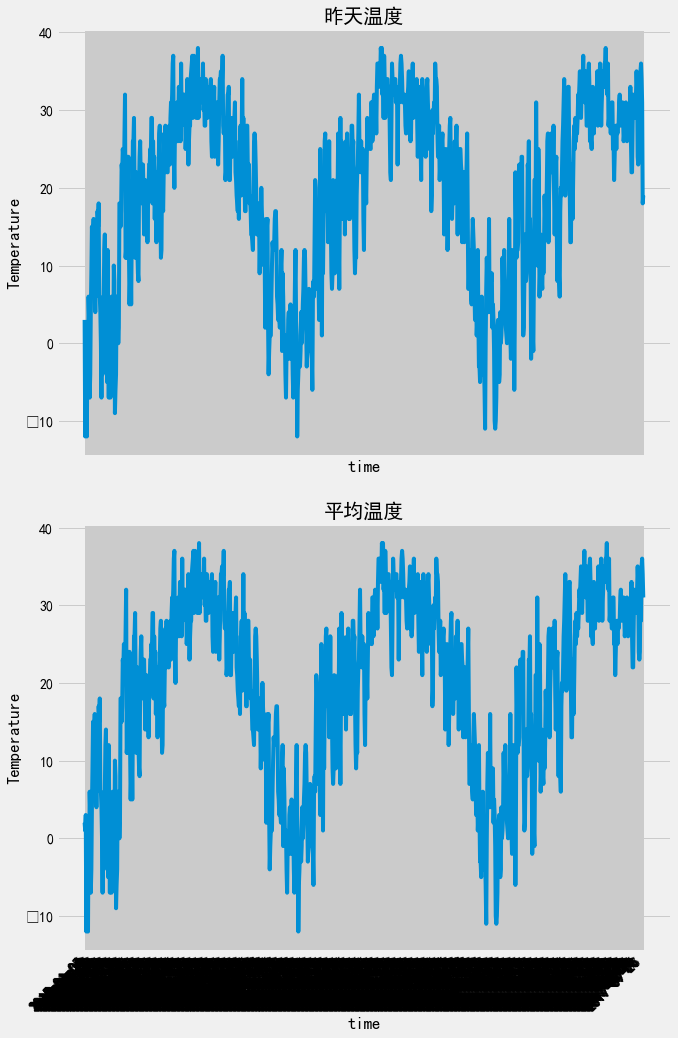

In [130]:
# 设置布局
fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols = 1,figsize = (10,15))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(date,features['actual'])
ax1.set_xlabel('time');ax1.set_ylabel('Temperature');ax1.set_title('昨天温度')

# 标签值
ax2.plot(date,features['temp_1'])
ax2.set_xlabel('time');ax2.set_ylabel('Temperature');ax2.set_title('平均温度')

plt.tight_layout(pad = 2)

In [131]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 40 columns):
date               997 non-null object
average            997 non-null int64
max_average        997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
actual             997 non-null float64
temp_2             997 non-null float64
temp_1             997 non-null float64
mintempm_1         997

d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-package

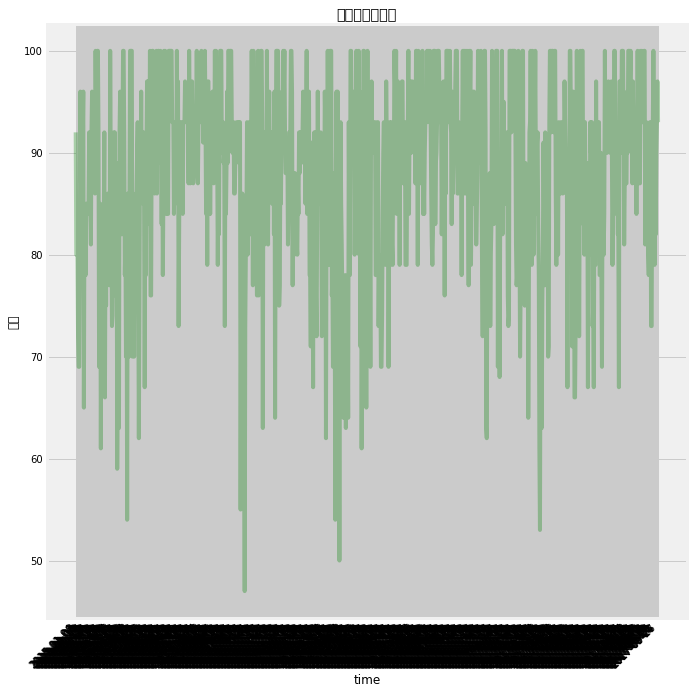

In [12]:
# 设置布局
fig,ax1 = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(date,features['maxhumidity_1'],color = 'green',alpha = 0.3)

ax1.set_xlabel('time');ax1.set_ylabel('湿度');ax1.set_title('前天的最大湿度')


plt.tight_layout(pad = 2)

Text(0.5, 1.0, '前天的降水量')

d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38477 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


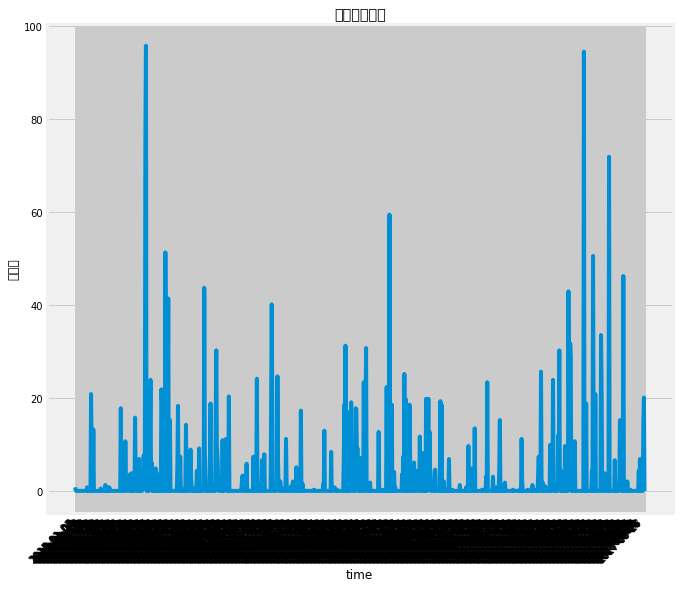

In [13]:
# 设置布局
fig,ax2 = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax2.plot(date,features['precipm_1'])
ax2.set_xlabel('time');ax2.set_ylabel('降水量');ax2.set_title('前天的降水量')

# Pairplots
# 按季节统计变量之间的关系：
# 不同颜色标识不同季节，在对角线之上x轴和y轴都是相同特征表示不同季节时时的分布情况，其他位置用散点图表示两个特征之间的关系，例如呈现出线性关系的代表二者的相关性很好

In [138]:
# # 传建一个季节变量
# seasons = []

# for month in data['date']:
#     if month in [1,2,12]:
#         seasons.append('winter')
#         elif month in[3,4,5]:
#             seasons.append('spring')
#         elif month in[6,7,8]:
#             seasons.append('summer')
#         elif month in [9,10,11]:
#             seasons.append('fall')
            
# # 有了季节就可以分析更多的东西了，选择的4个特征
# reduced_features = features[['meantempm','precipm_1','minhumidity_1','meanpressurem_1']]
# reduced_features['season'] = seasons

In [139]:
# import seaborn as sns

# sns.set(style= 'ticks',color_codes = True);

# # 选择颜色模板
# palette = sns.xkcd_palette(["dark blue",'dark green','gold','orange'])

# # 绘制pairplot;  diag_kind = 'kde': 指定为kde,表示对角线上的是直方图，更圆滑

# 特征和特征自己之间是
# sns.pairplot(reduced_features,hue = 'season',diag_kind = 'kde',palette = palette,
#              plot_kws = dict(alpha = 0.7),diag_kws = dict(shade = True));

# 数据与处理

In [106]:
import pandas as pd

features = pd.read_csv('./data/csv/whether01.csv')
features.head()

,date,average,max_average,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
1,2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2,2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
3,2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
4,2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [107]:
labels= features['actual']

In [108]:
feature = features.drop('actual',axis = 1)
features = feature.drop('date',axis = 1)

In [109]:
features.head()

,average,max_average,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,1016.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
1,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,1033.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,1032.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
3,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,1036.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
4,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,1035.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [110]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 38 columns):
average            997 non-null int64
max_average        997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
temp_2             997 non-null float64
temp_1             997 non-null float64
mintempm_1         997 non-null float64
mintempm_2         997 non-null float64
mintempm_3         99

In [111]:
# 数据集切分
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features,labels,
                                                                        test_size = 0.25,
                                                                        random_state = 0)

In [69]:
feature_list = list(features.columns)

# 转换成成所需格式
import numpy as np

features = np.array(features)
labels = np.array(labels)

In [112]:
print('训练集的特征：',train_features.shape)
print('训练集的标签：',train_labels.shape)
print('测试集的特征：',test_features.shape)
print('测试集的标签：',test_labels.shape)

训练集的特征： (747, 38)
训练集的标签： (747,)
测试集的特征： (250, 38)
测试集的标签： (250,)


In [40]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 270 to 491
Data columns (total 38 columns):
average            250 non-null int64
max_average        250 non-null int64
mintempm           250 non-null int64
meantempm_1        250 non-null float64
meantempm_2        250 non-null float64
meantempm_3        250 non-null float64
meandewptm_1       250 non-null float64
meandewptm_2       250 non-null float64
meandewptm_3       250 non-null float64
meanpressurem_1    250 non-null float64
meanpressurem_2    250 non-null float64
meanpressurem_3    250 non-null float64
maxhumidity_1      250 non-null float64
maxhumidity_2      250 non-null float64
maxhumidity_3      250 non-null float64
minhumidity_1      250 non-null float64
minhumidity_2      250 non-null float64
minhumidity_3      250 non-null float64
temp_2             250 non-null float64
temp_1             250 non-null float64
mintempm_1         250 non-null float64
mintempm_2         250 non-null float64
mintempm_3         

# 先来看看老数据的结果 

In [77]:
import pandas as pd

original_features = pd.read_csv('./data/csv/train_temp.csv')

# original_features = pd.get_dummies(original_features)

In [78]:
import numpy as np

# 数据和标签转换
original_labels = np.array(original_features['actual'])

original_feature = original_features.drop('actual',axis = 1)

original_features = original_feature.drop('date',axis = 1)

In [79]:
# 数据的切分
from sklearn.model_selection import train_test_split

original_train_features,original_test_features,original_train_labels,original_test_labels = train_test_split(original_features,original_labels,test_size = 0.25,random_state = 0)

In [80]:
original_feature_list = list(original_features.columns)

original_features = np.array(original_features)

In [81]:
# original_feature.head()

In [82]:
print(original_train_features.shape)
print(original_train_labels.shape)

(224, 4)
(224,)


In [92]:
original_feature_indices = ['max_average','average','temp_1','temp_2']
test_features = test_features[original_feature_indices]

# 用同样的树模型进行建模
from sklearn.ensemble import RandomForestRegressor

# 同样的参数与随机种子
rf = RandomForestRegressor(n_estimators = 100,random_state = 0)

# 这里使用的是老数据集
rf.fit(original_train_features,original_train_labels);

predictions = rf.predict(test_features)

# 先计算温度平均误差
errors = abs(predictions - test_labels)

print('平均温度误差：',round(np.mean(errors),2),'degrees')

mape = (errors / (test_labels+0.01))
        
accuracy =100 - np.mean(mape)
        
print('Accuracy:',round(accuracy,2),"%")

平均温度误差： 2.6 degrees
Accuracy: 96.51 %


# 新数据来了，只增大数据量的话，结果会提升吗？？？

In [97]:
from sklearn.ensemble import RandomForestRegressor

# 删除新的特征，保证数据特征一致

orginal_train_features = train_features[original_feature_indices]

orginal_test_features = test_features[original_feature_indices]

# 生成模型
rf = RandomForestRegressor(n_estimators = 100,random_state = 0)
# 训练模型
rf.fit(orginal_train_features,train_labels);

# 预测结果
baseline_predictions = rf.predict(original_test_features) 

baseline_errors = abs(baseline_predictions - original_test_labels)

In [99]:
print('平均误差：',round(np.mean(baseline_errors),2),'degrees.')

# (MAPE)
baseline_mape = np.mean(baseline_errors / (original_test_labels+0.01))

baseline_accuracy = 100 - baseline_mape

print("Accuracy: ",round(baseline_accuracy,2),'%')

平均误差： 1.69 degrees.
Accuracy:  99.88 %


# 加入新的特征 

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf_exp = RandomForestRegressor(n_estimators = 100,random_state = 0)
rf_exp.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [105]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 494 to 684
Data columns (total 38 columns):
average            747 non-null int64
max_average        747 non-null int64
mintempm           747 non-null int64
meantempm_1        747 non-null float64
meantempm_2        747 non-null float64
meantempm_3        747 non-null float64
meandewptm_1       747 non-null float64
meandewptm_2       747 non-null float64
meandewptm_3       747 non-null float64
meanpressurem_1    747 non-null float64
meanpressurem_2    747 non-null float64
meanpressurem_3    747 non-null float64
maxhumidity_1      747 non-null float64
maxhumidity_2      747 non-null float64
maxhumidity_3      747 non-null float64
minhumidity_1      747 non-null float64
minhumidity_2      747 non-null float64
minhumidity_3      747 non-null float64
temp_2             747 non-null float64
temp_1             747 non-null float64
mintempm_1         747 non-null float64
mintempm_2         747 non-null float64
mintempm_3         

In [113]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 270 to 491
Data columns (total 38 columns):
average            250 non-null int64
max_average        250 non-null int64
mintempm           250 non-null int64
meantempm_1        250 non-null float64
meantempm_2        250 non-null float64
meantempm_3        250 non-null float64
meandewptm_1       250 non-null float64
meandewptm_2       250 non-null float64
meandewptm_3       250 non-null float64
meanpressurem_1    250 non-null float64
meanpressurem_2    250 non-null float64
meanpressurem_3    250 non-null float64
maxhumidity_1      250 non-null float64
maxhumidity_2      250 non-null float64
maxhumidity_3      250 non-null float64
minhumidity_1      250 non-null float64
minhumidity_2      250 non-null float64
minhumidity_3      250 non-null float64
temp_2             250 non-null float64
temp_1             250 non-null float64
mintempm_1         250 non-null float64
mintempm_2         250 non-null float64
mintempm_3         

In [114]:
predictions = rf_exp.predict(test_features)

# 评估
errors = abs(predictions - test_labels)

print('平均误差:',round(np.mean(errors),2),'degrees')

mape = np.mean(errors / (test_labels + 0.01))

improvement_baseline = abs(mape - baseline_mape) / baseline_mape
print('特征增多模型效果提升:',round(improvement_baseline,2),'%')

accuracy = 100 - mape
print('Acuracy:',round(accuracy,2),'%')

平均误差: 1.13 degrees
特征增多模型效果提升: 20.09 %
Acuracy: 97.45 %


# 特征重要性

In [118]:
# 特征名字
importances = list(rf_exp.feature_importances_)

# 名字，数值组合在一起
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]

# 排序
feature_importances = sorted(feature_importances,key = lambda x:x[1],reverse = True)

# 打印出来
[print('特征：{:20} 重要性：{}'.format(*pair)) for pair in feature_importances];

特征：meantempm_1          重要性：0.95
特征：minhumidity_1        重要性：0.02
特征：mintempm_1           重要性：0.01
特征：average              重要性：0.0
特征：max_average          重要性：0.0
特征：mintempm             重要性：0.0
特征：meantempm_2          重要性：0.0
特征：meantempm_3          重要性：0.0
特征：meandewptm_1         重要性：0.0
特征：meandewptm_2         重要性：0.0
特征：meandewptm_3         重要性：0.0
特征：meanpressurem_1      重要性：0.0
特征：meanpressurem_2      重要性：0.0
特征：meanpressurem_3      重要性：0.0
特征：maxhumidity_1        重要性：0.0
特征：maxhumidity_2        重要性：0.0
特征：maxhumidity_3        重要性：0.0
特征：minhumidity_2        重要性：0.0
特征：minhumidity_3        重要性：0.0
特征：temp_2               重要性：0.0
特征：temp_1               重要性：0.0
特征：mintempm_2           重要性：0.0
特征：mintempm_3           重要性：0.0
特征：maxdewptm_1          重要性：0.0
特征：maxdewptm_2          重要性：0.0
特征：maxdewptm_3          重要性：0.0
特征：mindewptm_1          重要性：0.0
特征：mindewptm_2          重要性：0.0
特征：mindewptm_3          重要性：0.0
特征：maxpressurem_1       重要性：0.0
特征：maxpressurem_2       重要性：0.0
特征：ma

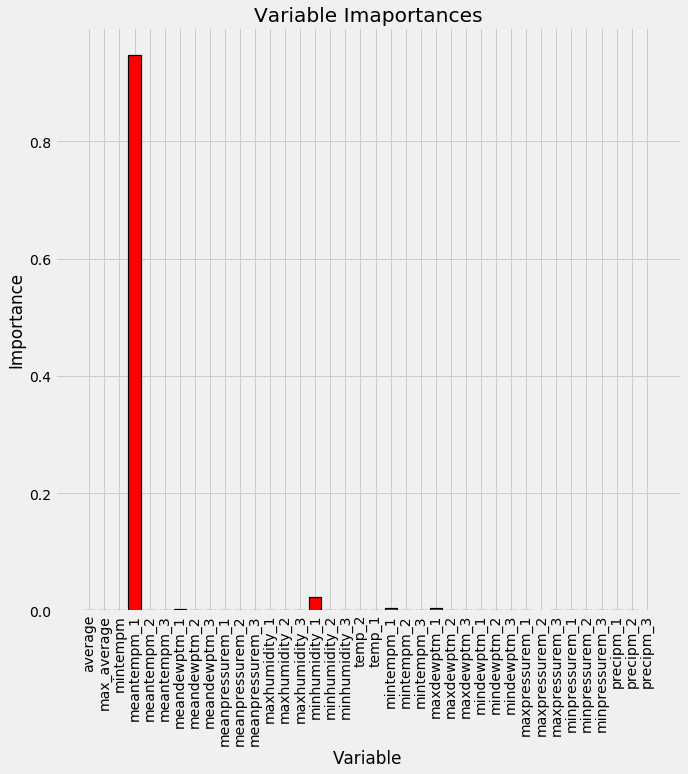

In [122]:
# 指定风格
plt.style.use('fivethirtyeight')

# 定义画布大小
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))

## 指定位置
x_values = list(range(len(importances)))

# 绘图
plt.bar(x_values,importances,orientation = 'vertical',color = 'r',edgecolor = 'k',linewidth = 1.2)

# x轴的名字,竖着写
plt.xticks(x_values,feature_list,rotation = 'vertical')

# 图名
plt.ylabel('Importance');
plt.xlabel('Variable');
plt.title('Variable Imaportances');

# 特征重要性累加，看看95% 之前有多少个

In [ ]:
# fig = plt.subplots(figsize = (12,12))

# 对特征进行排序
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# 累加重要性  np.cumsum()
cumulative_importances = np.cumsum(sorted_importances)

# 绘制成折线图
plt.plot(x_values,cumulative_importances,'g-')

# 话一条红色虚线图，0.95
plt.hlines(y = 0.95,xmin = 0,xmax = len(sorted_importances),color = 'r',linestyle = 'dashed')

# 话一条蓝色虚线图，0.95
plt.hlines(y = 0.97,xmin = 0,xmax = len(sorted_importances),color = 'b',linestyle = 'dashed')

# X轴
plt.xticks(x_values,sorted_features,rotation = 'vertical')

# Y 轴和名字
plt.xlabel('Variable');
plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

# 把他们列出来

In [127]:
# 看看有几个特征可以使重要性达到97%
print('Number of features for 95% importance:',np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 2


# 测试集和训练集要使用一样的

In [136]:
# 选择这些特征
important_feature_names = [feature[0] for feature in feature_importances[:2]]


# 这种方法不可以
# 找到他们的名字
# important_indices = [feature_list.index(feature) for feature in important_feature_names]
# 重新创建训练集
# important_train_features = train_features[:,important_indices]
# important_test_features = test_features[:,important_indices]

# important_indices

important_feature_names

['meantempm_1', 'minhumidity_1']

In [137]:
# 重新创建训练集
important_train_features = train_features[important_feature_names]
important_test_features = test_features[important_feature_names]

# 数据维度
print('Important train features shape:',important_train_features.shape)

print('Important test features shape:',important_test_features.shape)

Important train features shape: (747, 2)
Important test features shape: (250, 2)


# 用这两个重要的特征进行训练

In [138]:
# 训练模型
rf_exp.fit(important_train_features,train_labels);

In [140]:
print('Important train labels shape:',train_labels.shape)

print('Important test labels shape:',test_labels.shape)

Important train labels shape: (747,)
Important test labels shape: (250,)


In [141]:
# 用同样的测试集
predictions = rf_exp.predict(important_test_features)

# 评估结果
errors = abs(predictions - test_labels)

print('平均温度误差:',round(np.mean(errors),2),'degrees')

mape = errors/(test_labels+0.01)

# accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy :',round(accuracy,2),'%')


# 原来：
# 平均误差: 1.13 degrees
# 特征增多模型效果提升: 20.09 %
# Acuracy: 97.45 %

平均温度误差: 1.38 degrees
Accuracy : 99.01 %


# 计算下 Trade-Offs
- 树模型本身具有特征选择的被动技能，模型没有提升，可以看看时间性能上有没有进步

In [145]:
import time

# 使用所有特征
all_features_time = []

for _ in range(10):
    start_time = time.time()
    rf_exp.fit(train_features,train_labels)
    all_features_predictions = rf_exp.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)
    
all_features_time = np.mean(all_features_time)
print('使用所有特征时建模与测试的平均时间消耗：',round(all_features_time,2),'秒。')

使用所有特征时建模与测试的平均时间消耗： 0.57 秒。


In [146]:
import time

reduced_features_time = []

for _ in range(10):
    start_time = time.time()
    rf_exp.fit(important_train_features,train_labels)
    reduced_features_predictions = rf_exp.predict(important_test_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)
    
reduced_features_time = np.mean(reduced_features_time)
print('使用所有特征时建模与测试的平均时间消耗：',round(reduced_features_time,2),'秒。')

使用所有特征时建模与测试的平均时间消耗： 0.1 秒。


# 可见，二者的时间相差还是非常大的

# Accuracy VS Run-Time

In [167]:
# 用分别的预测值来计算评估结果
all_accuracy = 100 * (1- np.mean(abs(all_features_predictions - test_labels) / (test_labels+0.5)))
reduced_accuracy = 100 * (1- np.mean(abs(reduced_features_predictions - test_labels) / (test_labels+0.5)))

# 创建一个df来保存结果
comparison = pd.DataFrame({'features':['all (20)','reduced (2)'],
                          'run_time':[round(all_features_time,2),round(reduced_features_time,2)],
                          'accuracy':[round(all_accuracy,2),round(reduced_accuracy,2)]})
comparison[['features','accuracy','run_time']]

,features,accuracy,run_time
0,all (20),93.63,0.57
1,reduced (2),92.87,0.10


In [168]:
relative_accuracy_decrease = 100 * (all_accuracy - reduced_accuracy) / all_accuracy
print('相对accuracy下降：',round(relative_accuracy_decrease,3),'%')

relative_runtime_decrease = 100 * (all_features_time - reduced_features_time) / all_features_time
print('相对时间效率下降：',round(relative_runtime_decrease,3),'%')

相对accuracy下降： 0.809 %
相对时间效率下降： 82.755 %


# 性价比！！！！！！！
# 模型效果相差不多，时间效率提升相对更大，最后将所有的实验结果汇总到一起进行对比

In [184]:
import pandas as pd

original_features = pd.read_csv('./data/csv/train_temp.csv')

original_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
date           299 non-null object
max_average    299 non-null int64
average        299 non-null int64
temp_1         299 non-null int64
temp_2         299 non-null int64
actual         299 non-null int64
dtypes: int64(5), object(1)
memory usage: 14.1+ KB


In [178]:
import numpy as np

# 取出标签值，转换格式
original_labels = np.array(original_features['actual'])

# 删除标签值，以及date属性值
original_feature = original_features.drop('actual',axis = 1)
original_features = original_feature.drop('date',axis = 1)

# 保存列名
original_feature_list = list(original_features.columns)

original_features = np.array(original_features)


# 切分数据集
from sklearn.model_selection import train_test_split


original_train_features,original_test_features,original_train_labels,original_test_labels = train_test_split(original_features,
                                                                                                            original_labels,
                                                                                                            test_size = 0.25,
                                                                                                            random_state = 0)

In [179]:
original_train_features.shape

(224, 4)

In [180]:
original_test_features.shape

(75, 4)

In [181]:
original_train_labels.shape

(224,)

In [182]:
original_test_labels.shape

(75,)

In [187]:
# original_feature_indices = [feature_list.index(feature) for feature in feature_list if feature not in ['','']]

original_feature_indices = ['max_average','average','temp_1','temp_2']
original_test_features = test_features[original_feature_indices]

original_features_time = []

for _ in range(10):
    start_time = time.time()
    rf.fit(original_train_features,original_train_labels)
    original_features_predictions = rf.predict(original_test_features)
    end_time = time.time()
    original_features_time.append(end_time - start_time)
    
original_features_time = np.mean(original_features_time)

In [198]:
# Caculate mean absulate error for each model

original_mae = np.mean(abs(original_features_predictions - test_labels))
exp_all_mae = np.mean(abs(all_features_predictions - test_labels))
exp_reduced_mae = np.mean(abs(reduced_features_predictions - test_labels))

original_accuracy = 100 * (1 - np.mean(abs(original_features_predictions - test_labels)/(test_labels+0.5)))

# 创建一个DataFrame为了comparison
model_comparison = pd.DataFrame({'model':['original','exp_all','exp_reduced'],
                                'error (degrees)':[original_mae,exp_all_mae,exp_reduced_mae],
                                'accuracy':[original_accuracy,all_accuracy,reduced_accuracy],
                                'run_time (s)':[original_features_time,all_features_time,reduced_features_time]})

In [199]:
# Order the DataFrame
model_comparison = model_comparison[['model','error (degrees)','accuracy','run_time (s)']]

In [200]:
model_comparison

,model,error (degrees),accuracy,run_time (s)
0,original,2.600280,81.408931,0.065590
1,exp_all,1.129840,93.627071,0.565983
2,exp_reduced,1.384449,92.869941,0.097603


Text(0.5, 1.0, 'Model Run_Time Comparison')

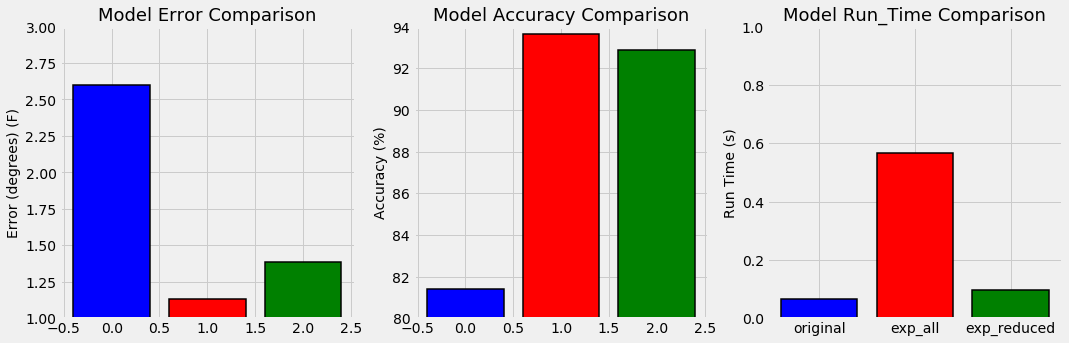

In [206]:
# 绘图来看下
# 设置总体布局,一行三列进行比较
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1,ncols = 3,figsize = (16,5))

# x轴
x_values = [0,1,2]
labels = list(model_comparison['model'])
plt.xticks(x_values,labels)

# 设置字体大小
fontdict = {'fontsize':18}
fontdict_yaxis = {'fontsize':14}

# 预测值温度和真实值温度差异进行对比
ax1.bar(x_values,model_comparison['error (degrees)'],color = ['b','r','g'],edgecolor = 'k',linewidth = 1.5)

# 指定取值范围
ax1.set_ylim(bottom = 1.0,top = 3.0)
ax1.set_ylabel('Error (degrees) (F)',fontdict = fontdict_yaxis);
ax1.set_title('Model Error Comparison',fontdict = fontdict)

# 预测值 Accuracy 进行对比
ax2.bar(x_values,model_comparison['accuracy'],color = ['b','r','g'],edgecolor = 'k',linewidth = 1.5)

# 指定取值范围
ax2.set_ylim(bottom = 80,top = 94)
ax2.set_ylabel('Accuracy (%)',fontdict = fontdict_yaxis);
ax2.set_title('Model Accuracy Comparison',fontdict = fontdict)

# 预测值时间效率进行对比
ax3.bar(x_values,model_comparison['run_time (s)'],color = ['b','r','g'],edgecolor = 'k',linewidth = 1.5)

# 指定取值范围
ax3.set_ylim(bottom = 0,top = 1)
ax3.set_ylabel('Run Time (s)',fontdict = fontdict_yaxis);
ax3.set_title('Model Run_Time Comparison',fontdict = fontdict)

- original代表的是老数据，数据量少特征少的；
- exp_all代表的是完整的数据；
- exp_reduced代表的是我们按照阈值选择95%的部分重要特征数据集，结果也很明显
- 但是数据量越多，特征越多，模型的效率就会提升一些，时间效率也会下降

# 网格与随机参数选择

In [6]:
import pandas as pd

features = pd.read_csv('./data/csv/whether01.csv')

In [7]:
import numpy as np

# 取出标签值，转换格式
labels = np.array(features['actual'])

# 删除标签值，以及date属性值
feature = features.drop('actual',axis = 1)
features = feature.drop('date',axis = 1)


In [10]:

# 保存列名
feature_list = list(features.columns)

features = np.array(features)
                       

In [8]:

# 切分数据集
from sklearn.model_selection import train_test_split


train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.25,random_state = 0)
                                     

In [9]:
print('Training Features Shape:',train_features.shape)
print('Training Labels Shape:',train_labels.shape)
print('Testing Features Shape:',test_features.shape)
print('Testing Labels Shape:',test_labels.shape)

Training Features Shape: (747, 38)
Training Labels Shape: (747,)
Testing Features Shape: (250, 38)
Testing Labels Shape: (250,)


In [11]:
print('{:0.1f} years of data in the training set'.format(train_features.shape[0] / 365))
print('{:0.1f} years of data in the test set'.format(test_features.shape[0] / 365))

2.0 years of data in the training set
0.7 years of data in the test set


# # 选择最大的数据集，和这三个最重要的特征

In [12]:

# meantempm_1          重要性：0.95
# 特征：minhumidity_1        重要性：0.02
# 特征：mintempm_1   

important_feature_names = ['meantempm_1','minhumidity_1','mintempm_1']

# 创建训练集和测试集只用这三个最重要的特征
important_train_features = train_features[important_feature_names]
important_test_features = test_features[important_feature_names]

print('Important train feautres shape:',important_train_features.shape)

print('Important test feautres shape:',important_test_features.shape)

Important train feautres shape: (747, 3)
Important test feautres shape: (250, 3)


In [13]:
# 用仅有的最终的特征
train_features = important_train_features[:]
test_features = important_test_features[:]

feature_list = important_feature_names[:]

In [14]:
train_features.info()
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 494 to 684
Data columns (total 3 columns):
meantempm_1      747 non-null float64
minhumidity_1    747 non-null float64
mintempm_1       747 non-null float64
dtypes: float64(3)
memory usage: 23.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 270 to 491
Data columns (total 3 columns):
meantempm_1      250 non-null float64
minhumidity_1    250 non-null float64
mintempm_1       250 non-null float64
dtypes: float64(3)
memory usage: 7.8 KB


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 0)

from pprint import pprint

# 打印出所有的参数
pprint(rf.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


# 各参数含义： 
- 'bootstrap': True,： 要不要做随机的采样；肯定的
- 'criterion': 'mse'： 目标方程或者是熵值的计算损失方法，指定为mse,计算误差
******- 'max_depth': None,： 限制树的深度，或者是树分裂的特征
- 'max_leaf_nodes': None,： 最多的叶结点的个数
-  'min_samples_leaf': 1,：
-  'min_samples_split': 2,：

# 随机参数选择方法实践

# 开始尝试各种参数的调参过程

# 随机选择的函数RandomizedSearchCV()
- np.linspace() 函数用于在指定间隔内返回均匀间隔的数字：
- numpy.linspace(start, 
	stop, 
	num=50, 
	endpoint=True, 
	retstep=False, 
	dtype=None, 
	axis=0
)
- start ： array_like。序列的起始值。

- stop ： array_like。序列的结束值，除非endpoint设置为False。在这种情况下，序列由除了num+1等距样本的最后一个以外的所有样本组成，因此stop被排除在外。请注意，当endpoint为False时，步骤大小会发生变化。

- num ： int，可选。要生成的样本数。默认值为50。必须为非负数。

- endpoint ： bool，可选。如果为True，则stop是最后一个样本。否则，它不包括在内。默认为True。

- retstep ： bool，可选。如果为True，则返回（samples，step），其中step是样本之间的间距。

- dtype ： dtype，可选。输出数组的类型。如果dtype未给出，则从其他输入参数推断数据类型。

- axis ： int，可选。结果中的轴用于存储样本。仅当启动或停止类似于数组时才相关。默认情况下（0），样本将沿着在开头插入的新轴。使用-1在结尾处获取轴。

In [16]:
from sklearn.model_selection import RandomizedSearchCV


# 设置一个参数的空间

In [17]:
# 建立模型中数的个数
n_estimators = [int(x) for x in np.linspace(start = 200,stop = 2000,num = 10)]

# 最大特征的选择方式
max_features = ['auto','sqrt']

# 树的最大深度
max_depth = [int(x) for x in np.linspace(10,20,num = 2)]
max_depth.append(None)

# 节点最小分裂所需样本个数
min_samples_split = [2,5,10]

#叶子节点最小样本数，任何分裂不能让其子节点样本数少于此值
min_samples_leaf = [1,2,4]

# 样本采样方法
bootstrap = [True,False]

# 把参数做成字典结构
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}

In [18]:
# 随机选择最合适的参数组合
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
                               n_iter = 100,scoring = 'neg_mean_absolute_error',
                              cv = 3,verbose = 2,random_state = 0,n_jobs = -1)

# 执行寻找操作
rf_random.fit(train_features,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   42.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


# RandomizedSearchCV中的常用参数，
-  estimator = rf: 指定随机选择选择的算法，实例化出来的算法；RandomizedSearchCV这个方法是一个通用的，并不是专门为随机森林设计的，所以需要指定选择的算法模型是什么
-  param_distributions = random_grid,指定参数空间的大小非常重要，！！！！
Distributions:参数的候选空间，用字典的方式给出了所需的参数分布
-  n_iter = 100： 表示要迭代多少次，这里设置为100，随机做100次（寻找参数组合的个数，）
- scoring = 'neg_mean_absolute_error'： 列出每个模型执行完成后，的评估方法
- cv = 3: 交叉验证三折；
-  verbose = 2,打印出信息，要想打印出更加详细的信息的话，就设置该值更大一点 
- n_jobs = -1：让所有的cpu去跑代码，速度更快（多线程来跑这个程序，-1就是用所有的）

In [19]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

# 评估函数
- 对比一下，经过调参后的结果和默认的参数的结果，在随机森林模型中，默认的建立树的个数为10个，先给出评估标准：


In [20]:
def evaluate(model,test_features,test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / (test_labels+0.5))
    accuracy = 100 - mape
    
    print('平均误差：',np.mean(errors))
    print('Accuracy = {:0.2f}%'.format(accuracy))

# 老模型，没有设置任何参数

In [21]:
base_model = RandomForestRegressor(random_state = 0)
base_model.fit(train_features,train_labels)
evaluate(base_model,test_features,test_labels)

平均误差： 0.9110600000000002
Accuracy = 94.54%


d:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 利用最好的参数

In [22]:
best_random = rf_random.best_estimator_
evaluate(best_random,test_features,test_labels)

平均误差： 0.8051764038449414
Accuracy = 96.36%


# 先找到最好的参数的大致位置，普遍撒网（利用随机寻找，RandomizedSearchCV()函数），再利用GridSearchCV() 函数进行地毯式搜索，就可以找到最好的一组参数组合了

In [23]:
from sklearn.model_selection import GridSearchCV

# 网格搜索
param_grid = {
    'bootstrap':[True],
    'max_depth':[8,10,12],
    'max_features':['auto'],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[3,5,7],
    'n_estimators':[800,900,1000,1200]
}

# 选择基本算法模型
rf = RandomForestRegressor()

grid_Search = GridSearchCV(estimator = rf,param_grid = param_grid,scoring = 'neg_mean_absolute_error',cv = 3,
                          n_jobs = -1,verbose = 2)

In [24]:
# 执行搜索
grid_Search.fit(train_features,train_labels)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [25]:
grid_Search.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [26]:
best_grid = grid_Search.best_estimator_
evaluate(best_grid,test_features,test_labels)

平均误差： 0.8280947853316791
Accuracy = 96.40%


# Grid Search
- 用网络搜索的时候并不是把所有的可能性都放进去，而是分成不同的组分别执行，


In [39]:
# 网格搜索
param_grid = {
    'bootstrap':[True],
    'max_depth':[12,15,None],
    'max_features':[2,3,'auto'],
    #叶子节点最小样本数，任何分裂不能让其子节点样本数少于此值
    'min_samples_leaf':[1,2,4],
    # 节点最小分裂所需样本个数
    'min_samples_split':[2,5,10],
    'n_estimators':[900,1000,1200]
}

# 选择基本算法模型
rf = RandomForestRegressor()

grid_Search_ad = GridSearchCV(estimator = rf,param_grid = param_grid,scoring = 'neg_mean_absolute_error',cv = 3,
                          n_jobs = -1,verbose = 2)

grid_Search_ad.fit(train_features,train_labels)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [40]:
grid_Search_ad.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 900}

In [41]:
best_grid_ad = grid_Search_ad.best_estimator_
evaluate(best_grid_ad,test_features,test_labels)

平均误差： 0.801005217905551
Accuracy = 96.04%


# 误差怎么会更大了呢？？？ 视频中的结果是更好的呀？？？
# 得根据数据集的实际情况进行调参不能只按照视频中的调参数

In [44]:
print('随机模型参数：\n')
pprint(best_random.get_params())

随机模型参数：

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [43]:
print('最终模型参数：\n')
pprint(best_grid_ad.get_params())

最终模型参数：

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 900,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
